In [3]:
import pandas as pand
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sea
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsRegressor

In [4]:
data = pand.read_csv('Dataset/healthcare-dataset-stroke-data.csv')

In [5]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
print("(Rows, Columns) of Dataset:", data.shape)
rowAndColumn = pand.DataFrame(data)
print()
print("Features of the Dataset: ", rowAndColumn.columns.tolist())

(Rows, Columns) of Dataset: (5110, 12)

Features of the Dataset:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [7]:
print("Data Descriptions:")
print(data.iloc[:, 0:5].describe())
print()
print(data.iloc[:, 5:12].describe())

Data Descriptions:
                 id          age  hypertension  heart_disease
count   5110.000000  5110.000000   5110.000000    5110.000000
mean   36517.829354    43.226614      0.097456       0.054012
std    21161.721625    22.612647      0.296607       0.226063
min       67.000000     0.080000      0.000000       0.000000
25%    17741.250000    25.000000      0.000000       0.000000
50%    36932.000000    45.000000      0.000000       0.000000
75%    54682.000000    61.000000      0.000000       0.000000
max    72940.000000    82.000000      1.000000       1.000000

       avg_glucose_level          bmi       stroke
count        5110.000000  4909.000000  5110.000000
mean          106.147677    28.893237     0.048728
std            45.283560     7.854067     0.215320
min            55.120000    10.300000     0.000000
25%            77.245000    23.500000     0.000000
50%            91.885000    28.100000     0.000000
75%           114.090000    33.100000     0.000000
max           

In [20]:
nullCheck = data.isnull().sum()
print(nullCheck)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [22]:
duplicateCheck = data.duplicated().sum()
print(duplicateCheck)

0


In [9]:
data.ever_married.unique()

data.replace(to_replace="Urban", value=1, inplace=True)
data.replace(to_replace="Rural", value=0, inplace=True)

data.replace(to_replace="Yes", value=1, inplace=True)
data.replace(to_replace="No", value=0, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_7884\3671124556.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace="Rural", value=0, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_7884\3671124556.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace="No", value=0, inplace=True)


In [10]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataImputed = pand.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.id)
dataImputed = dataImputed.reset_index(drop=True)

In [12]:
dataImputed.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
dataImputed = pand.get_dummies(dataImputed, columns=['work_type', 'smoking_status', 'gender'])
dataImputed.drop(columns=['id'], inplace=True)
dataImputed.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False,False,True,False
1,61.0,0,0,1,0,202.21,28.7,1,False,False,False,True,False,False,False,True,False,True,False,False
2,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,False,True,False,False,True,False
3,49.0,0,0,1,1,171.23,34.4,1,False,False,True,False,False,False,False,False,True,True,False,False
4,79.0,1,0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,True,False,True,False,False


In [14]:
yData = dataImputed.pop('stroke').to_numpy()
xData = dataImputed.to_numpy()

xData = xData.astype(np.float32)
yData = yData.astype(np.float32)
xData.shape, yData.shape

((5110, 19), (5110,))

In [15]:
Split = int(0.70*len(xData))

xTrain = xData[:Split]
yTrain = yData[:Split]

xTest = xData[Split:]
yTest = yData[Split:]

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier()
rfClassifier.fit(xTrain, yTrain)
rfClassifier.score(xTrain, yTrain)

1.0

In [17]:
from sklearn.metrics import classification_report

y_pred = rfClassifier.predict(xTrain)
classification_report = classification_report(yTrain, y_pred)

print(classification_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3328
         1.0       1.00      1.00      1.00       249

    accuracy                           1.00      3577
   macro avg       1.00      1.00      1.00      3577
weighted avg       1.00      1.00      1.00      3577



In [18]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(yTrain, y_pred)
print(confusionMatrix)

[[3328    0]
 [   0  249]]


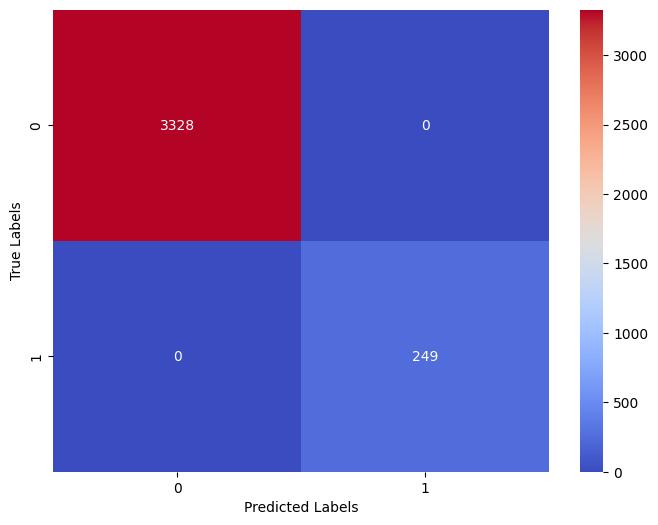

In [19]:
plot.figure(figsize=(8,6))
sea.heatmap(confusionMatrix, annot=True, fmt="d", cmap="coolwarm")
plot.xlabel("Predicted Labels")
plot.ylabel("True Labels")
plot.show()